# Data Exploration:
## Here:
- Load the dataset.
- Explore the data structure, types, and summary statistics.
- Visualize relationships between features and the target variable. 
- Identify missing values and outliers.

### Necessary imports

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

### Load the data set (Loaded from data/boston_housing_init.csv)

In [182]:
df = pd.read_csv('../data/boston_housing_init.csv')
print(df.columns)
df.head(10)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


##### Observation withdrawn:
- we have 13 columns that includes 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', and 'furnishingstatus'.

### Exploration of the data structure, types, and summary statistics.

In [183]:
# Data structure 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [184]:
# Data types of each columns

df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [185]:
#summary stats for numeric values

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [186]:
#summary stats inclduing objects dtype

df.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


#### Creating one secondary dataframe which coverts every dtype "object" to numerical value so that we can get all integers that are suitable for every visualization below. 


#### This converts: 
- yes/no to 1/0
- unfurnished/semi-furnished/furnished to 0/1/2 respectively 

In [187]:
df_numeric = df.copy()

# 'yes'/'no'to 1/0

bool_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df_numeric[bool_cols] = df_numeric[bool_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# handling furnishing status

df_numeric['furnishingstatus'] = df_numeric['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2,
}) 
df_numeric



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


#### Visualization of relationships between features and the target variable. 


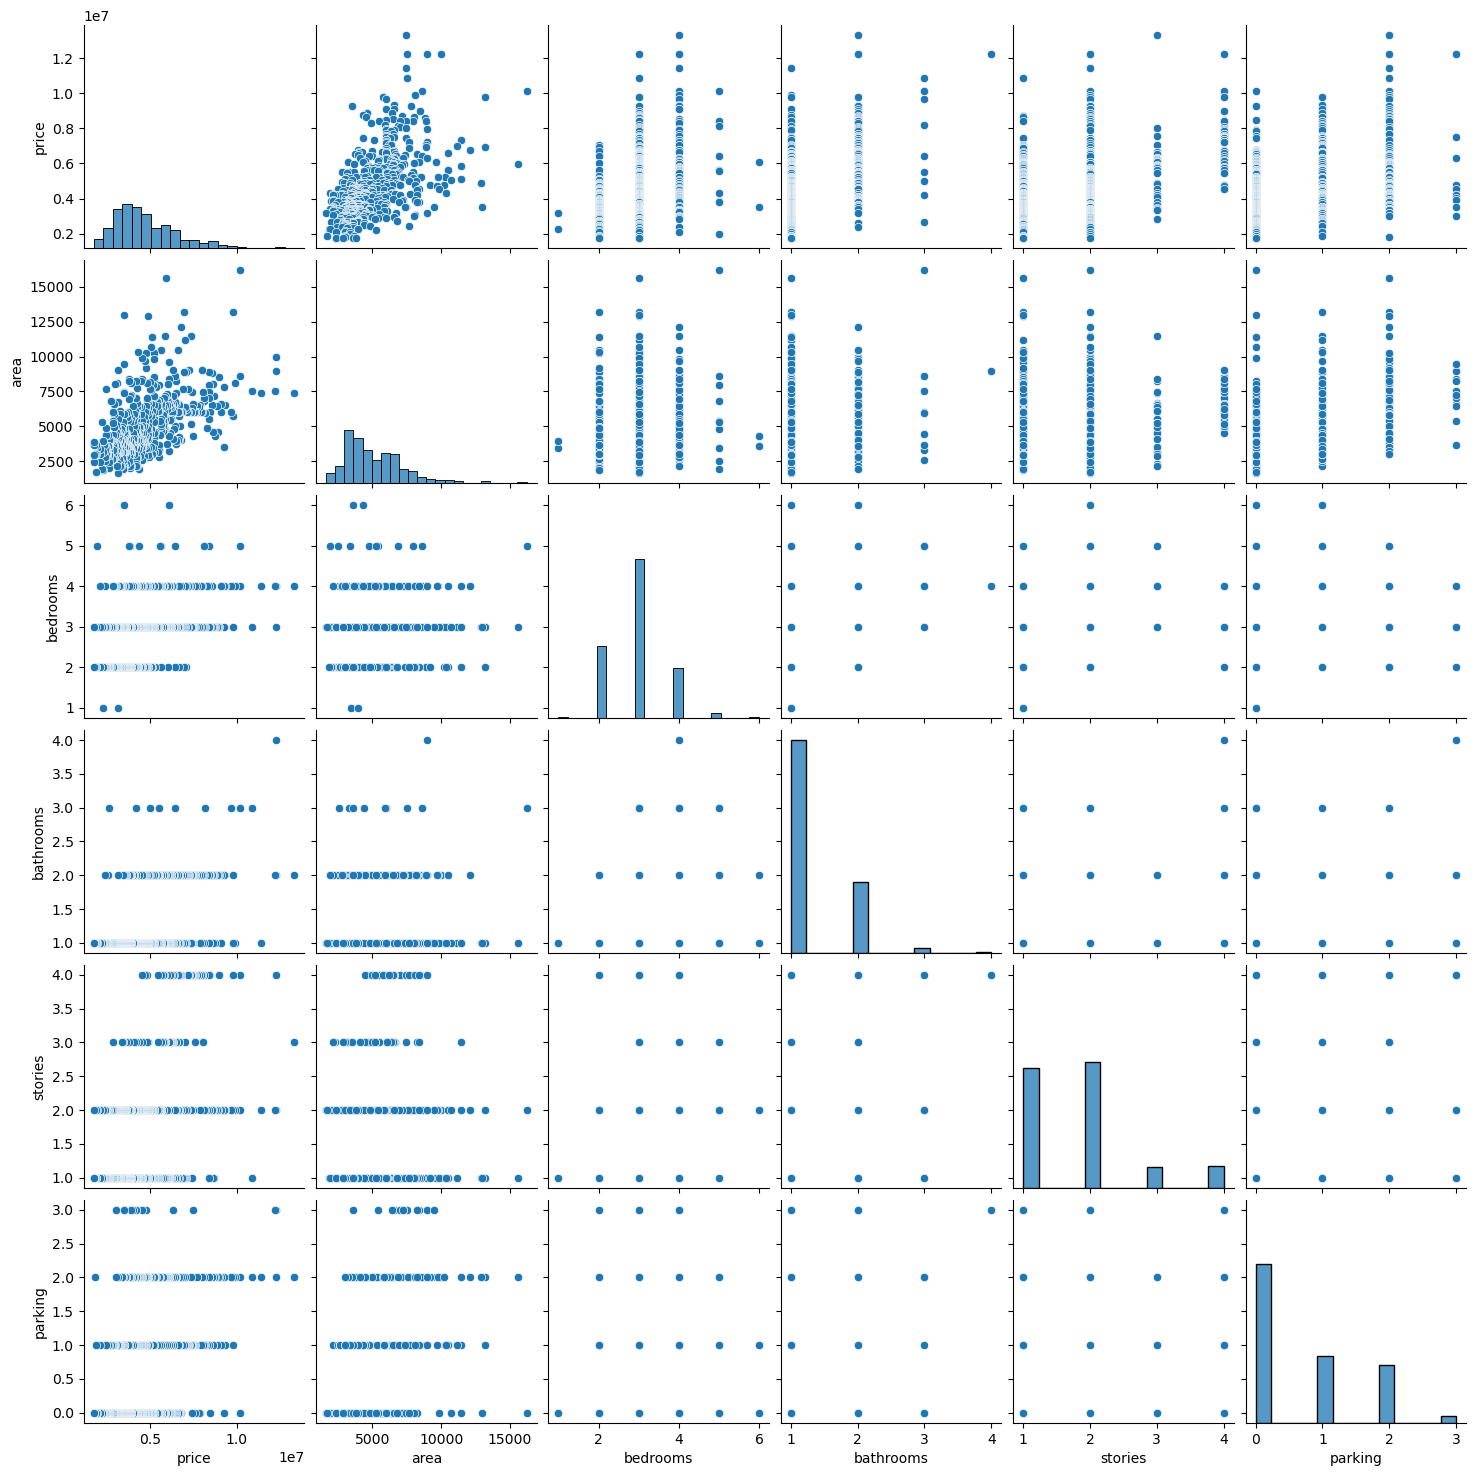

In [188]:
#Pair plot to see overall trend. 

sns.pairplot(df)
plt.show()

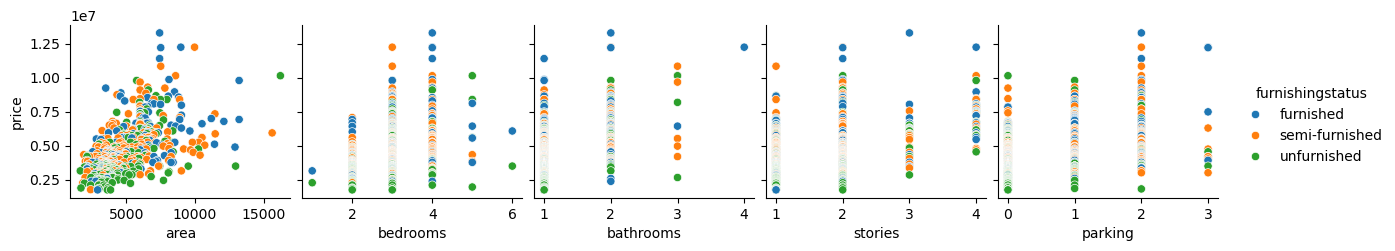

In [189]:
# Pair plot to see trends for different columns while categorizing the pricing based on furnishing status. 

sns.pairplot(data=df, x_vars=['area', 'bedrooms', 'bathrooms', 'stories', 'parking'],
              y_vars='price', kind='scatter', hue= 'furnishingstatus')
plt.show()


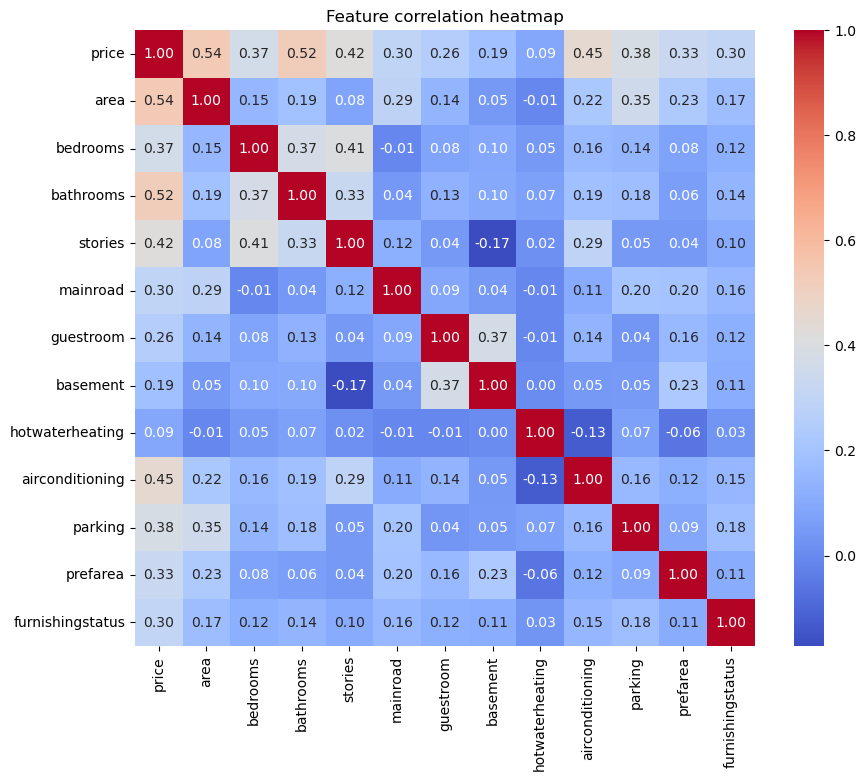

In [190]:
# Correlation heatmap to find how strongly each numerical feature correlates with eachother
# we here use df_numeric to effectively render corelation. 

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature correlation heatmap")
plt.show()


#### Some common insights: 
#### Positive corelation 
- The slight strong corelation 0.54 between 'area' and 'price' is visualized. the more the area the more the price is.  
- Also the price seems to upsurge if the property has Air-conditioning. (0.45)

#### Negative corelation
- 'stories' and 'basement' are negatively corelated with eachother, this does not play significant role to predict the pricing. 
- same for 'air-conditioning' vs 'waterheating'

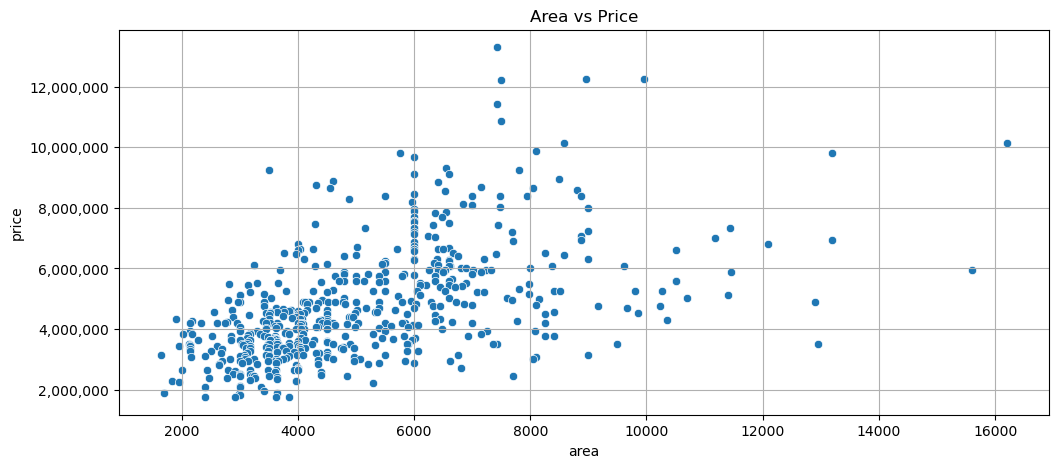

In [191]:
# Scatter plot for 'area' vs 'price'
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['area'], y=df['price'],  )

# Set y-axis formatting to show the full numbers (not in scientific notation)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid()
plt.title("Area vs Price")
plt.show()


#### Observation:
- No Clear Trend: points are scattered without any clear upward or downward pattern, it indicates little to no correlation between the two variables.
- But the little is: "The more the area, the more the price"

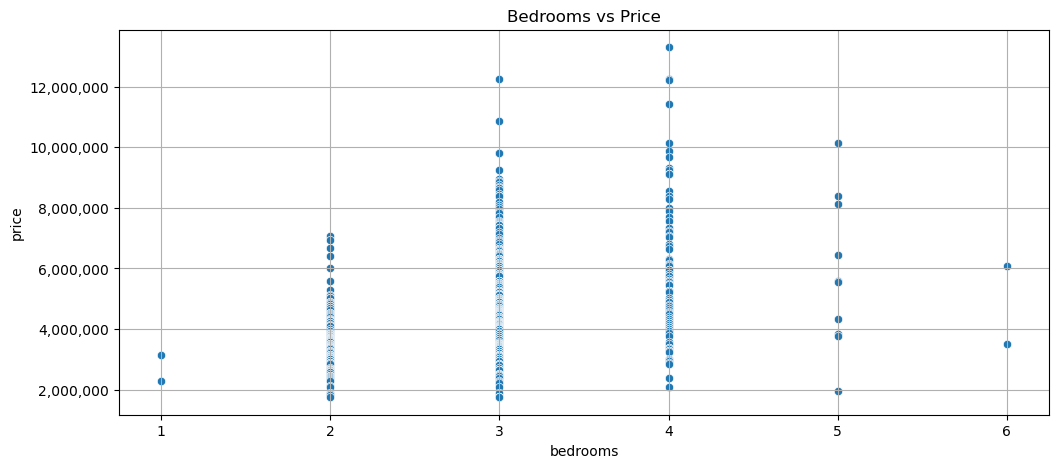

In [192]:
# Scatter plot for 'bedrooms' vs 'price'

plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['bedrooms'], y=df['price'],  )

# Set y-axis formatting to show the full numbers (not in scientific notation)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid()
plt.title("Bedrooms vs Price")
plt.show()



#### Observation:  
- Property with 2-4 bedrooms has the highest price range
- can say the mid range bedroom count has the highest, lowest for too low 1 and too high 5-6

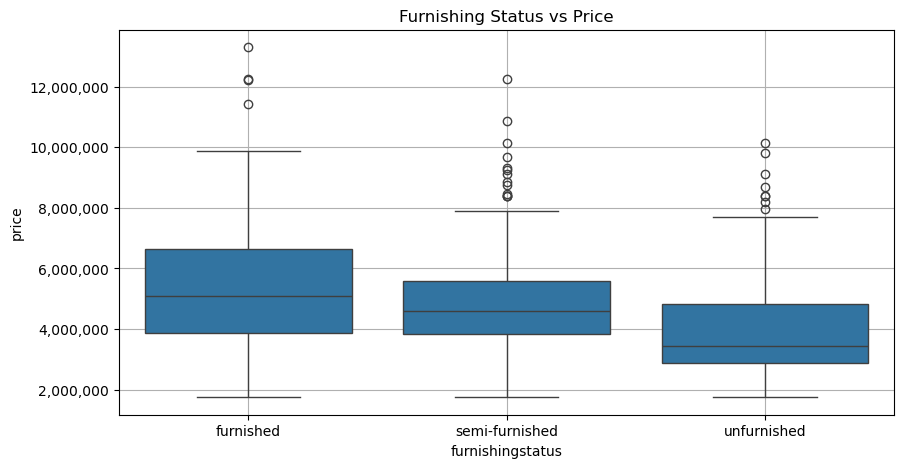

In [193]:
# box plot for categorical variables

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['furnishingstatus'], y=df['price'])
plt.title("Furnishing Status vs Price")

# Set y-axis formatting to show the full numbers (not in scientific notation)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.grid()
plt.show()


#### Observation: 

- A linear relation can be visualized as the Furnished property has higher price, a bit lower for semi-furnished and lowest for unfurnished property.  

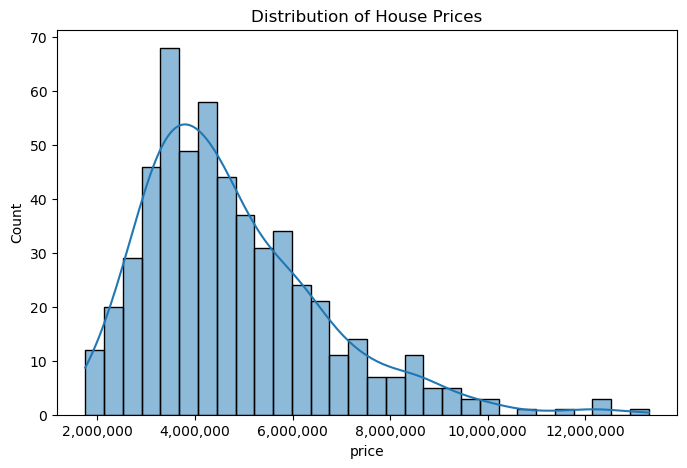

In [194]:
# Histogram to visualize districution of house prices

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
# Set x-axis formatting to show the full numbers (not in scientific notation)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title("Distribution of House Prices")
plt.show()


#### Observation: 
- There are more property that has low to mid range in price, i.e. 2million to 8million
- Insignificant amount of counts that has higher price. 

#### Identifying missing values and outliers.

In [195]:
# Check if there is any missing values

df.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [196]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [197]:
df_numeric.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [198]:
# Find missing percentage. (If any)

missing_percentage = (df.isnull().sum() / df.isnull().count()) * 100

missing_percentage

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

#### Observation
- No null and missing values found. 
- With the info(), describe(), dtypes done above, can conclude we don't have any outliers as well. 